# PA 7.2

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with lambda = 1.
Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

In [9]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [10]:
ames = pd.read_csv(r"C:/Users/achur/OneDrive/Desktop/School/CP Fall 2024/544/AmesHousing.csv")

Cross-validated RMSE for Ridge Regression (lambda=1): 28871.92
Cross-validated RMSE for Ridge Regression (lambda=1): 28871.92


Cross-validated RMSE for Ordinary Linear Regression: 13963006213446982.00
Cross-validated RMSE for Ordinary Linear Regression: 13963006213446982.00


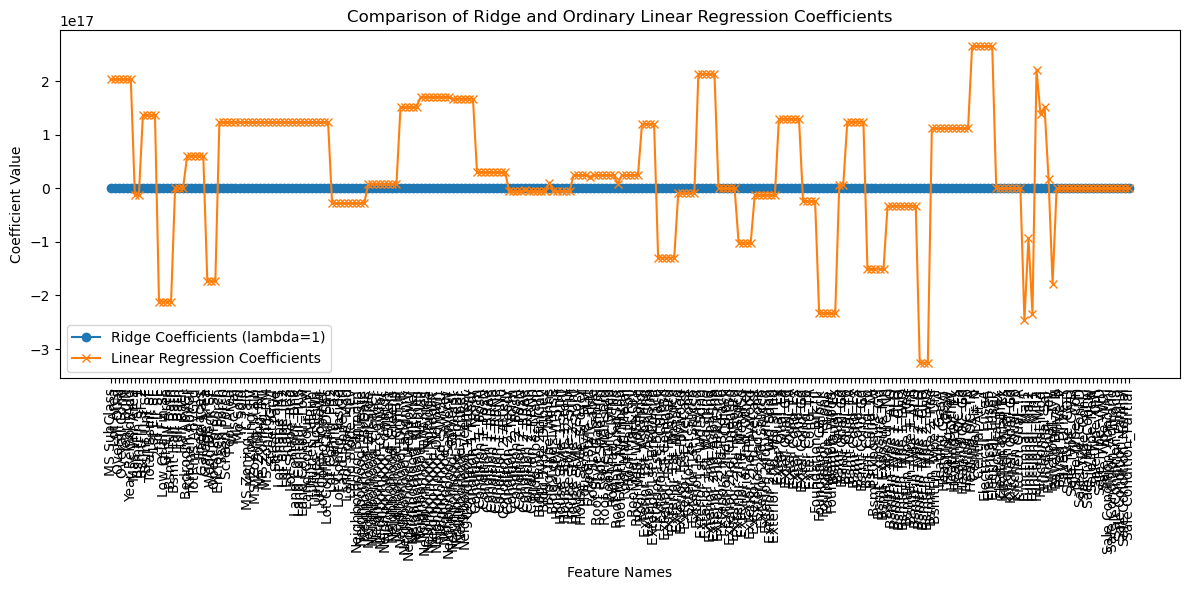

In [11]:
import matplotlib.pyplot as plt
# drop ones with mostly na values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:, good_cols]

# drop na values
ames = ames.dropna()

# variables
X = ames.drop(["SalePrice", "Order", "PID"], axis=1)
y = ames["SalePrice"]

# column transformer
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

# ridge regression pipeline with alpha=1
ridge_pipeline = Pipeline([
    ("preprocessing", ct),
    ("ridge_regression", Ridge(alpha=1))
])

# ordinary linear regression pipeline
linear_pipeline = Pipeline([
    ("preprocessing", ct),
    ("linear_regression", LinearRegression())
])

# cross validate ridge regression
ridge_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring="neg_root_mean_squared_error")
ridge_rmse = -ridge_scores.mean()
print(f"Cross-validated RMSE for Ridge Regression (lambda=1): {ridge_rmse:.2f}")

# cross validate ordinary linear regression
linear_scores = cross_val_score(linear_pipeline, X, y, cv=5, scoring="neg_root_mean_squared_error")
linear_rmse = -linear_scores.mean()
print(f"Cross-validated RMSE for Ordinary Linear Regression: {linear_rmse:.2f}")

# fit models on the entire dataset
ridge_pipeline.fit(X, y)
linear_pipeline.fit(X, y)

# extract coefficients (Ridge coefficients)
ridge_model = ridge_pipeline.named_steps["ridge_regression"]
ridge_coefficients = ridge_model.coef_

# extract coefficients (Linear Regression)
linear_model = linear_pipeline.named_steps["linear_regression"]
linear_coefficients = linear_model.coef_

# get feature names after one-hot encoding and standardization
preprocessed = ct.fit_transform(X)
num_features = make_column_selector(dtype_include=np.number)(X)
cat_features = make_column_selector(dtype_include=object)(X)
feature_names = ct.named_transformers_["standardize"].get_feature_names_out(num_features).tolist() + \
                ct.named_transformers_["dummify"].get_feature_names_out(cat_features).tolist()

# plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(feature_names, ridge_coefficients, 'o-', label="Ridge Coefficients (lambda=1)")
plt.plot(feature_names, linear_coefficients, 'x-', label="Linear Regression Coefficients")
plt.xticks(rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Ridge and Ordinary Linear Regression Coefficients")
plt.legend()
plt.tight_layout()
plt.show()

Using the same pipeline as previously, perform tuning on lambda.

You should always try lambda values on a log scale; that is, don’t use [1,2,3,4]; instead use something like [0.001, 0.01, 0.1, 1, 10]

Best Lambda (alpha): 10
Best Cross-Validated RMSE: 28633.51
Best Lambda (alpha): 10
Best Cross-Validated RMSE: 28633.51


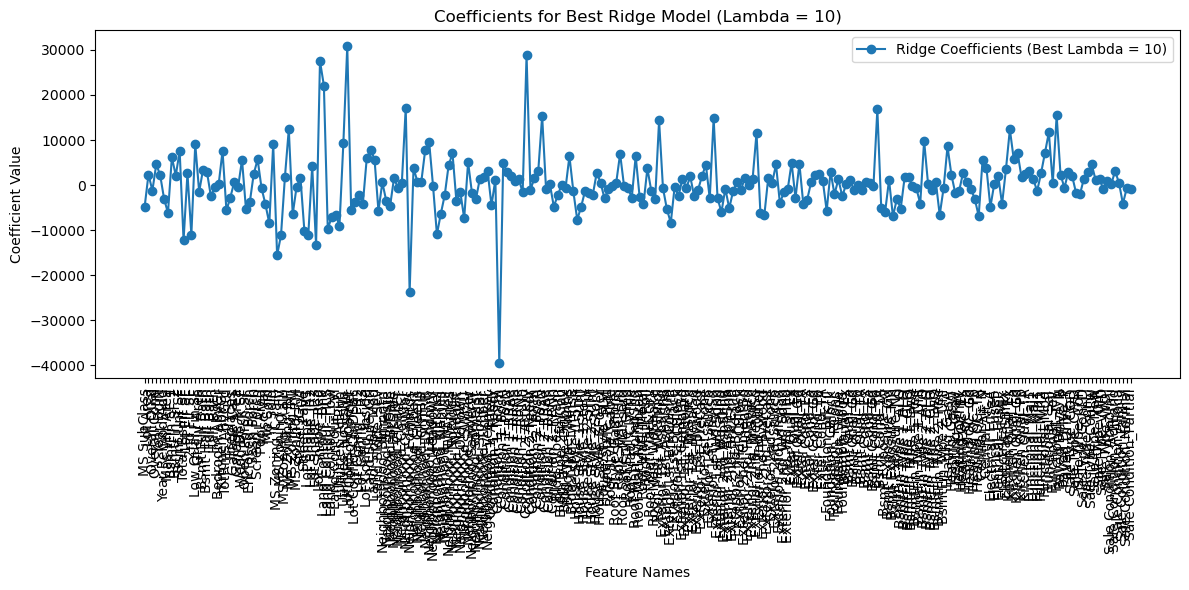

In [12]:
# Ridge Regression Pipeline
ridge_pipeline = Pipeline([
    ("preprocessing", ct),
    ("ridge_regression", Ridge())
])

# Parameter grid for tuning lambda (alpha) on a log scale
param_grid = {
    "ridge_regression__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Grid search with cross-validation
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(X, y)

# Extract best parameters and score
best_lambda = grid_search.best_params_["ridge_regression__alpha"]
best_rmse = -grid_search.best_score_

print(f"Best Lambda (alpha): {best_lambda}")
print(f"Best Cross-Validated RMSE: {best_rmse:.2f}")

# Fit the best model on the entire dataset
best_ridge_model = grid_search.best_estimator_
best_ridge_model.fit(X, y)

# Get and plot the coefficients for the best Ridge model
ridge_coefficients = best_ridge_model.named_steps["ridge_regression"].coef_

# Get feature names
preprocessed = ct.fit_transform(X)
num_features = make_column_selector(dtype_include=np.number)(X)
cat_features = make_column_selector(dtype_include=object)(X)
feature_names = ct.named_transformers_["standardize"].get_feature_names_out(num_features).tolist() + \
                ct.named_transformers_["dummify"].get_feature_names_out(cat_features).tolist()

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(feature_names, ridge_coefficients, 'o-', label=f"Ridge Coefficients (Best Lambda = {best_lambda})")
plt.xticks(rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Coefficient Value")
plt.title(f"Coefficients for Best Ridge Model (Lambda = {best_lambda})")
plt.legend()
plt.tight_layout()
plt.show()

Create a LASSO pipeline, and tune lambda.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS

C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.756e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.215e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.553e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.013e+09, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


Best Alpha (lambda) for Lasso: 100
Best Cross-Validated RMSE for Lasso: 28290.40
Best Alpha (lambda) for Lasso: 100
Best Cross-Validated RMSE for Lasso: 28290.40


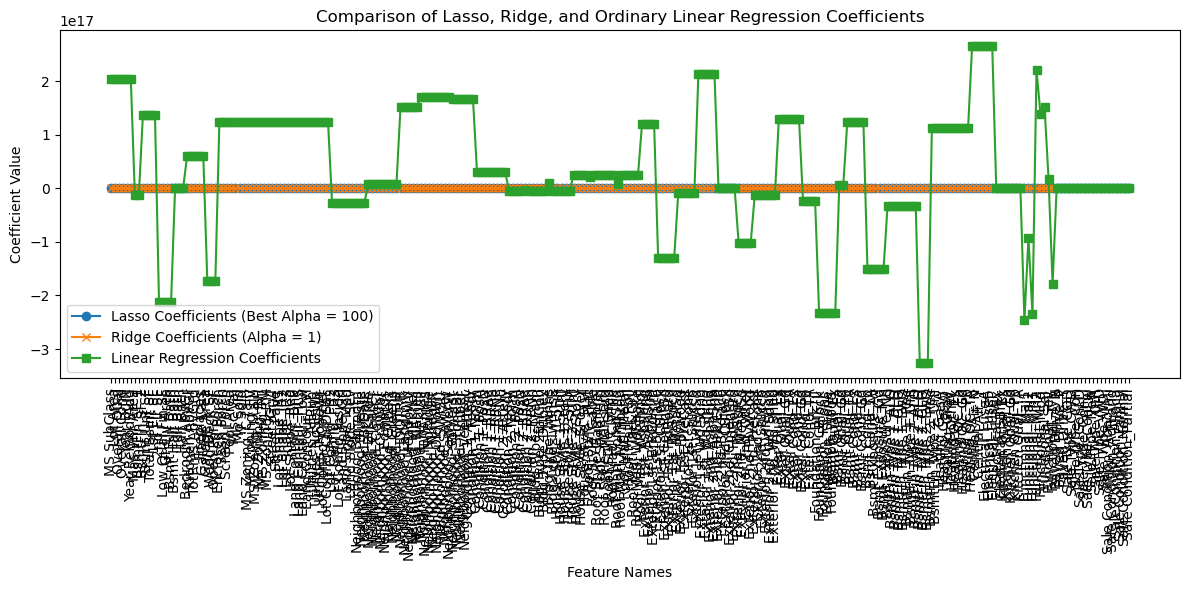

In [13]:
lasso_pipeline = Pipeline([
    ("preprocessing", ct),
    ("lasso_regression", Lasso(max_iter=10000))
])

# Parameter grid for tuning lambda (alpha) on a log scale for Lasso
param_grid = {
    "lasso_regression__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Grid search with cross-validation for Lasso
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(X, y)

# Extract best parameters and score
best_alpha = grid_search.best_params_["lasso_regression__alpha"]
best_rmse = -grid_search.best_score_

print(f"Best Alpha (lambda) for Lasso: {best_alpha}")
print(f"Best Cross-Validated RMSE for Lasso: {best_rmse:.2f}")

# Fit the best Lasso model on the entire dataset
best_lasso_model = grid_search.best_estimator_
best_lasso_model.fit(X, y)

# Get coefficients for the best Lasso model
lasso_coefficients = best_lasso_model.named_steps["lasso_regression"].coef_

# Fit Ridge and Linear Regression models for comparison
ridge_model = Ridge(alpha=1).fit(ct.fit_transform(X), y)
linear_model = LinearRegression().fit(ct.fit_transform(X), y)
ridge_coefficients = ridge_model.coef_
linear_coefficients = linear_model.coef_

# Get feature names after preprocessing
preprocessed = ct.fit_transform(X)
num_features = make_column_selector(dtype_include=np.number)(X)
cat_features = make_column_selector(dtype_include=object)(X)
feature_names = ct.named_transformers_["standardize"].get_feature_names_out(num_features).tolist() + \
                ct.named_transformers_["dummify"].get_feature_names_out(cat_features).tolist()

# Plot the coefficients for comparison
plt.figure(figsize=(12, 6))
plt.plot(feature_names, lasso_coefficients, 'o-', label=f"Lasso Coefficients (Best Alpha = {best_alpha})")
plt.plot(feature_names, ridge_coefficients, 'x-', label="Ridge Coefficients (Alpha = 1)")
plt.plot(feature_names, linear_coefficients, 's-', label="Linear Regression Coefficients")
plt.xticks(rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Lasso, Ridge, and Ordinary Linear Regression Coefficients")
plt.legend()
plt.tight_layout()
plt.show()

Create an Elastic Net pipeline, and tune lambda and alpha.
.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+09, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.136e+09, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.619e+09, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.054e+09, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e+09, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.340e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.043e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.313e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.380e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.016e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.530e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.281e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.791e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.477e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.286e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.756e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.215e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.553e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.013e+09, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


Best Alpha (lambda) for Elastic Net: 100
Best L1 Ratio for Elastic Net: 1.0
Best Cross-Validated RMSE for Elastic Net: 28290.40
Best Alpha (lambda) for Elastic Net: 100
Best L1 Ratio for Elastic Net: 1.0
Best Cross-Validated RMSE for Elastic Net: 28290.40


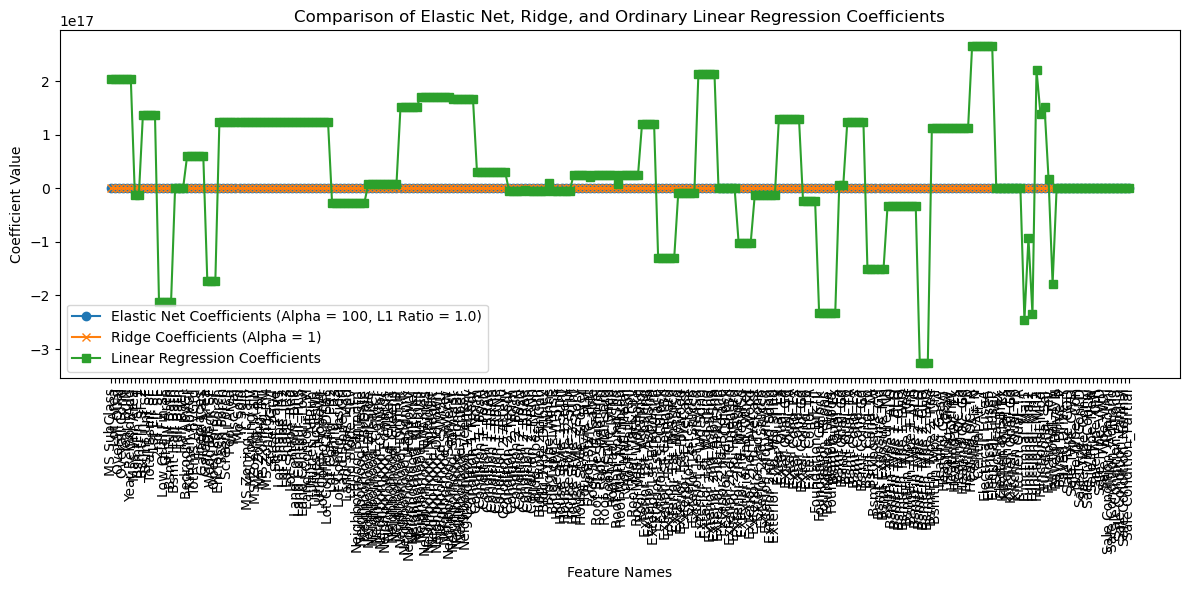

In [14]:
elastic_net_pipeline = Pipeline([
    ("preprocessing", ct),
    ("elastic_net", ElasticNet(max_iter=10000))
])

# Parameter grid for tuning alpha (regularization strength) and l1_ratio (mixing parameter)
param_grid = {
    "elastic_net__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "elastic_net__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # l1_ratio = 1 is equivalent to Lasso
}

# Grid search with cross-validation for Elastic Net
grid_search = GridSearchCV(elastic_net_pipeline, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(X, y)

# Extract best parameters and score
best_params = grid_search.best_params_
best_alpha = best_params["elastic_net__alpha"]
best_l1_ratio = best_params["elastic_net__l1_ratio"]
best_rmse = -grid_search.best_score_

print(f"Best Alpha (lambda) for Elastic Net: {best_alpha}")
print(f"Best L1 Ratio for Elastic Net: {best_l1_ratio}")
print(f"Best Cross-Validated RMSE for Elastic Net: {best_rmse:.2f}")

# Fit the best Elastic Net model on the entire dataset
best_elastic_net_model = grid_search.best_estimator_
best_elastic_net_model.fit(X, y)

# Get coefficients for the best Elastic Net model
elastic_net_coefficients = best_elastic_net_model.named_steps["elastic_net"].coef_

# Fit Ridge and Linear Regression models for comparison
ridge_model = Ridge(alpha=1).fit(ct.fit_transform(X), y)
linear_model = LinearRegression().fit(ct.fit_transform(X), y)
ridge_coefficients = ridge_model.coef_
linear_coefficients = linear_model.coef_

# Get feature names after preprocessing
preprocessed = ct.fit_transform(X)
num_features = make_column_selector(dtype_include=np.number)(X)
cat_features = make_column_selector(dtype_include=object)(X)
feature_names = ct.named_transformers_["standardize"].get_feature_names_out(num_features).tolist() + \
                ct.named_transformers_["dummify"].get_feature_names_out(cat_features).tolist()

# Plot the coefficients for comparison
plt.figure(figsize=(12, 6))
plt.plot(feature_names, elastic_net_coefficients, 'o-', label=f"Elastic Net Coefficients (Alpha = {best_alpha}, L1 Ratio = {best_l1_ratio})")
plt.plot(feature_names, ridge_coefficients, 'x-', label="Ridge Coefficients (Alpha = 1)")
plt.plot(feature_names, linear_coefficients, 's-', label="Linear Regression Coefficients")
plt.xticks(rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Elastic Net, Ridge, and Ordinary Linear Regression Coefficients")
plt.legend()
plt.tight_layout()
plt.show()